## Całkowanie numeryczne podstawy 

#### Zadanie 1:
Zaimplementuj 3 podstawowe algorytmy całkowania:

* wzór prostokątów,
* wzór trapezów
* wzór Simpsona



In [20]:
def integrateRectangle(start,end,numberOfPoints,function):
    dx=(end-start)/numberOfPoints
    result=0.0
    for i in range (1,numberOfPoints):
        result+=function(start+i*dx)
    result=(result+((function(start)+function(end))/2))*dx
    return result

def integrateTrapez(start,end,numberOfPoints,function):
    result=0
    dx=(end-start)/numberOfPoints
    for i in range (1,numberOfPoints):
        result+=function(start+i*dx)
    result=(result+(function(start)+function(end))/2)*dx
    return result

def integrateSimpson(start,end,numberOfPoints,function):
    result=0
    middleResult=0
    dx=(end-start)/numberOfPoints
    for i in range (1,numberOfPoints):
        x=start+i*dx
        middleResult+=function(x-dx/2)
        if i<numberOfPoints : result+=function(x)
    result=dx/6*(function(start)+function(end)+2*result+4*middleResult)
    return result

#### Zadanie 2:
Przetestuj działanie algorytmów dla różnych funkcji (zwizualizuj te funkcje!):

* $f(x) = x$
* $f(x) = 2 * x^2$
* $f(x) = 4*sin(x)$
* $f(x) = e^x$
* $f(x) = x*sin^2(x)+2*cos(x)$
* $f(x) = cos(\frac{(x+1)}{(x^2+0.04)})*e^x$

Oblicz dokładne wartości całek oznaczonych!. 

Sprawdź zachowanie implementacji dla kilku różnych przedziałów całkowania (min. 3)

Sprawdź różnice w dokładności dla różnych wartości kroków całkowania (min. 3)


From 1 to 10 number with 50 integration intervals 


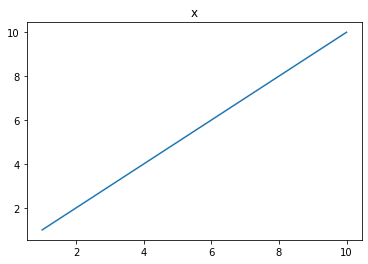

Value counted with Rectangle method -->  49.5
Value counted with Trapeze method -->  49.5
Value counted with Simpson method -->  48.3108
Actual value --> 49.5
Estimating errors:
For Rectangle method 0.0
For Trapeze method 0.0
For Simpson method 0.024024242424242417


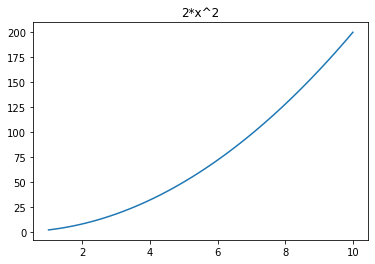

Value counted with Rectangle method -->  666.0971999999998
Value counted with Trapeze method -->  666.0971999999998
Value counted with Simpson method -->  642.4300559999999
Actual value --> 666.0
Estimating errors:
For Rectangle method 0.00014594594594566983
For Trapeze method 0.00014594594594566983
For Simpson method 0.03539030630630642


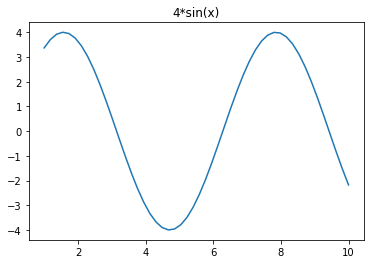

Value counted with Rectangle method -->  5.502590051641966
Value counted with Trapeze method -->  5.502590051641966
Value counted with Simpson method -->  5.741371647486246
Actual value --> 5.517495339778368
Estimating errors:
For Rectangle method 0.002701459125654865
For Trapeze method 0.002701459125654865
For Simpson method 0.040575713058394795


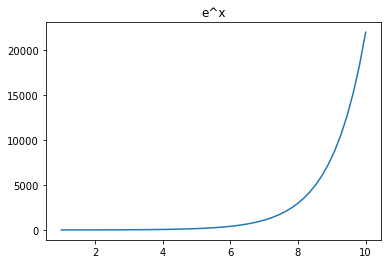

Value counted with Rectangle method -->  22083.17954539041
Value counted with Trapeze method -->  22083.17954539041
Value counted with Simpson method -->  19608.07465395777
Actual value --> 22023.74751297825
Estimating errors:
For Rectangle method 0.0026985431238319355
For Trapeze method 0.0026985431238319355
For Simpson method 0.10968491432245861


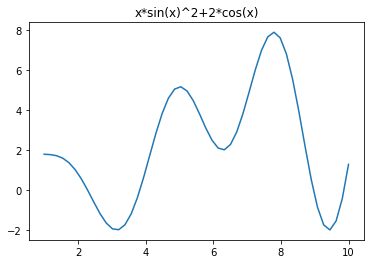

Value counted with Rectangle method -->  19.849556677182203
Value counted with Trapeze method -->  19.849556677182203
Value counted with Simpson method -->  19.774543594441628
Actual value --> 19.820948426197752
Estimating errors:
For Rectangle method 0.0014433341114312714
For Trapeze method 0.0014433341114312714
For Simpson method 0.0023412013773664885


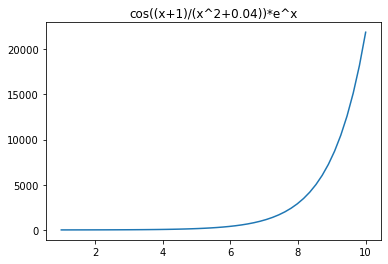

Value counted with Rectangle method -->  21899.521058295333
Value counted with Trapeze method -->  21899.521058295333
Value counted with Simpson method -->  19439.58472718923
Actual value --> 21840.37891160243
Estimating errors:
For Rectangle method 0.002707926768682744
For Trapeze method 0.002707926768682744
For Simpson method 0.10992456651646314


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

def show(function,start,end,numberOfPoints,funcName):
    x_array=np.linspace(start,end,num=50)
    y_array=function(x_array)
    plt.title(funcName)
    plt.plot(x_array,y_array)
    plt.show()
    

def showIntegral(function,start,end,numberOfPoints,funcName):
    show(function,start,end,numberOfPoints,funcName)
    intRectangle=integrateRectangle(start,end,numberOfPoints,function)
    intTrapeze=integrateTrapez(start,end,numberOfPoints,function)
    intSimpson=integrateSimpson(start,end,numberOfPoints,function)
    intReal=integrate.quad(function,start,end)[0]
    print("Value counted with Rectangle method --> ",intRectangle)
    print("Value counted with Trapeze method --> ",intTrapeze)
    print("Value counted with Simpson method --> ",intSimpson)
    print("Actual value -->",intReal)
    print("Estimating errors:")
    print("For Rectangle method",abs(intRectangle-intReal)/abs(intReal))
    print("For Trapeze method",abs(intTrapeze-intReal)/abs(intReal))
    print("For Simpson method",abs(intSimpson-intReal)/abs(intReal))

linearF=lambda x:x
squareF=lambda x:2*x**2
sinF=lambda x:4*np.sin(x)
eulerF=lambda x:np.e**x
trigonometricF=lambda x:x*np.sin(x)**2+2*np.cos(x)
mixF=lambda x:np.cos((x+1)/(x**2+0.04))*np.e**x

#Different range
print("From 1 to 10 number with 50 integration intervals ")
start=1
end=10
numberOfPoints=50
showIntegral(linearF,start,end,numberOfPoints,"x")
showIntegral(squareF,start,end,numberOfPoints,"2*x^2")
showIntegral(sinF,start,end,numberOfPoints,"4*sin(x)")
showIntegral(eulerF,start,end,numberOfPoints,"e^x")
showIntegral(trigonometricF,start,end,numberOfPoints,"x*sin(x)^2+2*cos(x)")
showIntegral(mixF,start,end,numberOfPoints,"cos((x+1)/(x^2+0.04))*e^x")

From 1 to 100 number with 50 integration intervals 


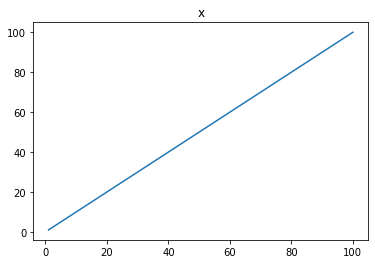

Value counted with Rectangle method -->  4999.499999999999
Value counted with Trapeze method -->  4999.499999999999
Value counted with Simpson method -->  4868.806800000001
Actual value --> 4999.5
Estimating errors:
For Rectangle method 1.8191713206779243e-16
For Trapeze method 1.8191713206779243e-16
For Simpson method 0.0261412541254123


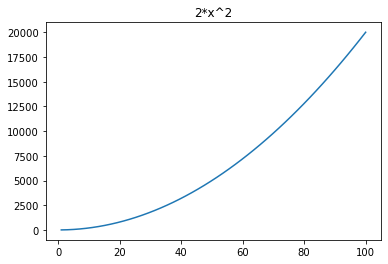

Value counted with Rectangle method -->  666795.3732
Value counted with Trapeze method -->  666795.3732
Value counted with Simpson method -->  640786.1325360001
Actual value --> 666666.0
Estimating errors:
For Rectangle method 0.00019405999406004045
For Trapeze method 0.00019405999406004045
For Simpson method 0.03881984001583986


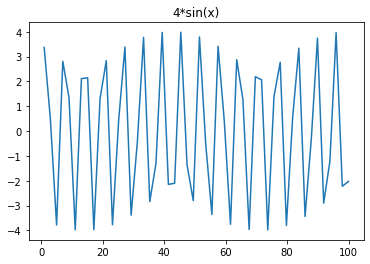

Value counted with Rectangle method -->  -0.8369134795412362
Value counted with Trapeze method -->  -0.8369134795412362
Value counted with Simpson method -->  3.97761180742715
Actual value --> -1.2880662656781041
Estimating errors:
For Rectangle method 0.3502558821376771
For Trapeze method 0.3502558821376771
For Simpson method 4.088049049505331


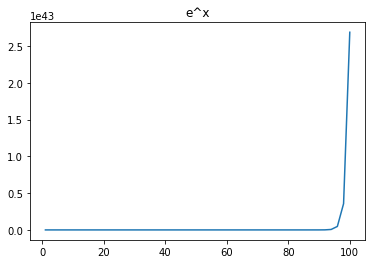

Value counted with Rectangle method -->  3.51382143698651e+43
Value counted with Trapeze method -->  3.51382143698651e+43
Value counted with Simpson method -->  1.3824744033211448e+43
Actual value --> 2.6881171418161173e+43
Estimating errors:
For Rectangle method 0.3071682711760615
For Trapeze method 0.3071682711760615
For Simpson method 0.48570901847412346


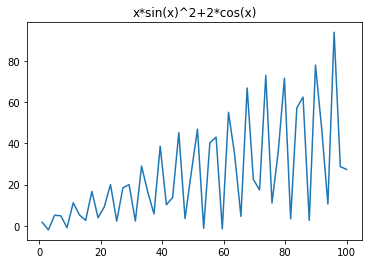

Value counted with Rectangle method -->  2478.5299411709957
Value counted with Trapeze method -->  2478.5299411709957
Value counted with Simpson method -->  2391.9269653060474
Actual value --> 2519.001166721277
Estimating errors:
For Rectangle method 0.01606637824743788
For Trapeze method 0.01606637824743788
For Simpson method 0.05044626540631144


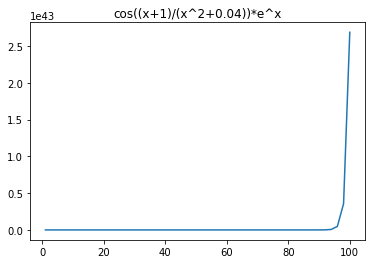

Value counted with Rectangle method -->  3.5136401163757135e+43
Value counted with Trapeze method -->  3.5136401163757135e+43
Value counted with Simpson method -->  1.38240243570587e+43
Actual value --> 2.687977179994426e+43
Estimating errors:
For Rectangle method 0.30716887871161164
For Trapeze method 0.30716887871161164
For Simpson method 0.48570901345645473


In [22]:
print("From 1 to 100 number with 50 integration intervals ")
start=1
end=100
numberOfPoints=50
showIntegral(linearF,start,end,numberOfPoints,"x")
showIntegral(squareF,start,end,numberOfPoints,"2*x^2")
showIntegral(sinF,start,end,numberOfPoints,"4*sin(x)")
showIntegral(eulerF,start,end,numberOfPoints,"e^x")
showIntegral(trigonometricF,start,end,numberOfPoints,"x*sin(x)^2+2*cos(x)")
showIntegral(mixF,start,end,numberOfPoints,"cos((x+1)/(x^2+0.04))*e^x")

From -5 to 30  number with 50 integration intervals 


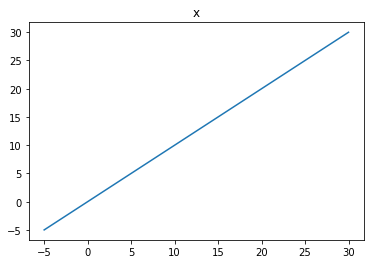

Value counted with Rectangle method -->  437.5
Value counted with Trapeze method -->  437.5
Value counted with Simpson method -->  423.66333333333324
Actual value --> 437.5
Estimating errors:
For Rectangle method 0.0
For Trapeze method 0.0
For Simpson method 0.03162666666666688


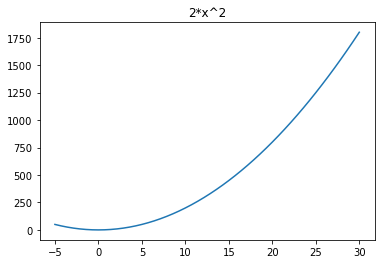

Value counted with Rectangle method -->  18089.049999999992
Value counted with Trapeze method -->  18089.049999999992
Value counted with Simpson method -->  17262.818999999992
Actual value --> 18083.333333333336
Estimating errors:
For Rectangle method 0.00031612903225748776
For Trapeze method 0.00031612903225748776
For Simpson method 0.04537406451612959


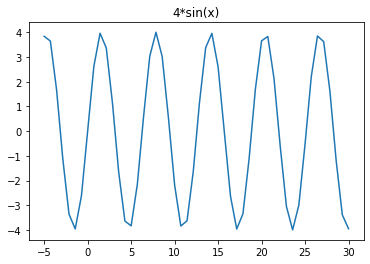

Value counted with Rectangle method -->  0.4963311970756458
Value counted with Trapeze method -->  0.4963311970756458
Value counted with Simpson method -->  2.348928606051716
Actual value --> 0.5176429423025688
Estimating errors:
For Rectangle method 0.04117074432064021
For Trapeze method 0.04117074432064021
For Simpson method 3.537739074743798


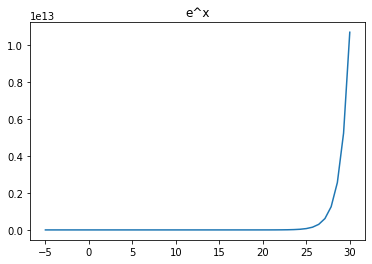

Value counted with Rectangle method -->  11119316390592.773
Value counted with Trapeze method -->  11119316390592.773
Value counted with Simpson method -->  7173058030681.641
Actual value --> 10686474581524.434
Estimating errors:
For Rectangle method 0.04050370454412241
For Trapeze method 0.04050370454412241
For Simpson method 0.32877227415269833


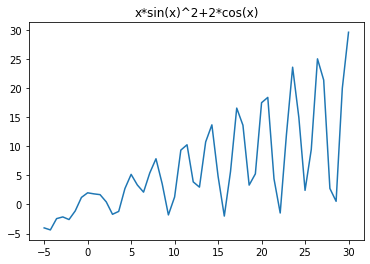

Value counted with Rectangle method -->  216.3678724315441
Value counted with Trapeze method -->  216.3678724315441
Value counted with Simpson method -->  203.34268179615881
Actual value --> 216.4763091535603
Estimating errors:
For Rectangle method 0.0005009172709946413
For Trapeze method 0.0005009172709946413
For Simpson method 0.06067004472108294


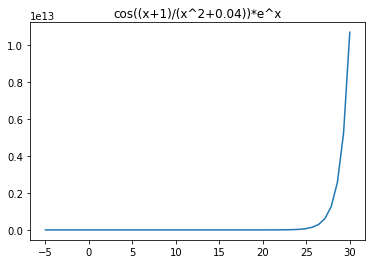

Value counted with Rectangle method -->  11112250360087.648
Value counted with Trapeze method -->  11112250360087.648
Value counted with Simpson method -->  7168366310170.508
Actual value --> 10679647848261.193
Estimating errors:
For Rectangle method 0.0405071888111825
For Trapeze method 0.0405071888111825
For Simpson method 0.3287825205455978


In [23]:
print("From -5 to 30  number with 50 integration intervals ")
start=-5
end=30
numberOfPoints=50
showIntegral(linearF,start,end,numberOfPoints,"x")
showIntegral(squareF,start,end,numberOfPoints,"2*x^2")
showIntegral(sinF,start,end,numberOfPoints,"4*sin(x)")
showIntegral(eulerF,start,end,numberOfPoints,"e^x")
showIntegral(trigonometricF,start,end,numberOfPoints,"x*sin(x)^2+2*cos(x)")
showIntegral(mixF,start,end,numberOfPoints,"cos((x+1)/(x^2+0.04))*e^x")

From -5 to 30 number with 10000 integration intervals 


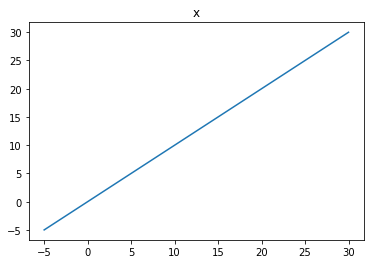

Value counted with Rectangle method -->  437.49999999999994
Value counted with Trapeze method -->  437.49999999999994
Value counted with Simpson method -->  437.43000408333336
Actual value --> 437.5
Estimating errors:
For Rectangle method 1.2992781453898976e-16
For Trapeze method 1.2992781453898976e-16
For Simpson method 0.00015999066666660968


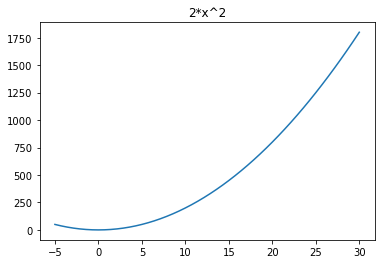

Value counted with Rectangle method -->  18083.333476249998
Value counted with Trapeze method -->  18083.333476249998
Value counted with Simpson method -->  18079.133823319044
Actual value --> 18083.333333333336
Estimating errors:
For Rectangle method 7.903225564887136e-09
For Trapeze method 7.903225564887136e-09
For Simpson method 0.00023223096853228602


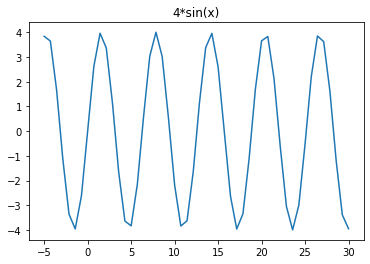

Value counted with Rectangle method -->  0.5176424138753092
Value counted with Trapeze method -->  0.5176424138753092
Value counted with Simpson method -->  0.5268670761125752
Actual value --> 0.5176429423025688
Estimating errors:
For Rectangle method 1.0208335059407475e-06
For Trapeze method 1.0208335059407475e-06
For Simpson method 0.01781949111288143


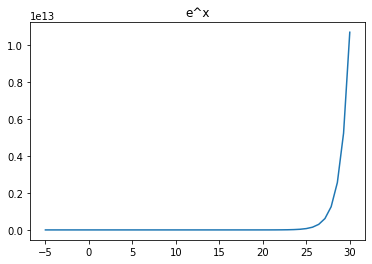

Value counted with Rectangle method -->  10686485490631.688
Value counted with Trapeze method -->  10686485490631.688
Value counted with Simpson method -->  10661583072446.361
Actual value --> 10686474581524.434
Estimating errors:
For Rectangle method 1.0208331260869436e-06
For Trapeze method 1.0208331260869436e-06
For Simpson method 0.0023292535707806336


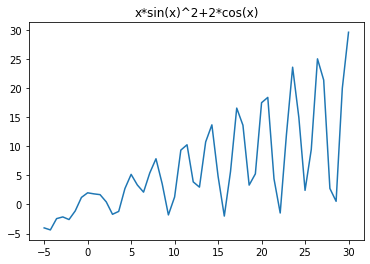

Value counted with Rectangle method -->  216.476306628391
Value counted with Trapeze method -->  216.476306628391
Value counted with Simpson method -->  216.40722978246166
Actual value --> 216.4763091535603
Estimating errors:
For Rectangle method 1.1664875953840705e-08
For Trapeze method 1.1664875953840705e-08
For Simpson method 0.00031910822652485277


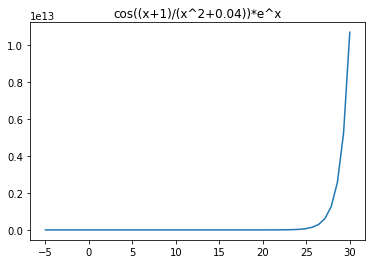

Value counted with Rectangle method -->  10679658751344.164
Value counted with Trapeze method -->  10679658751344.164
Value counted with Simpson method -->  10654771104078.613
Actual value --> 10679647848261.193
Estimating errors:
For Rectangle method 1.0209215814619121e-06
For Trapeze method 1.0209215814619121e-06
For Simpson method 0.0023293599691707424


In [24]:
#Different number intervals
print("From -5 to 30 number with 10000 integration intervals ")
start=-5
end=30
numberOfPoints=10000
showIntegral(linearF,start,end,numberOfPoints,"x")
showIntegral(squareF,start,end,numberOfPoints,"2*x^2")
showIntegral(sinF,start,end,numberOfPoints,"4*sin(x)")
showIntegral(eulerF,start,end,numberOfPoints,"e^x")
showIntegral(trigonometricF,start,end,numberOfPoints,"x*sin(x)^2+2*cos(x)")
showIntegral(mixF,start,end,numberOfPoints,"cos((x+1)/(x^2+0.04))*e^x")

From -5 to 30 number with integration 10 intervals 


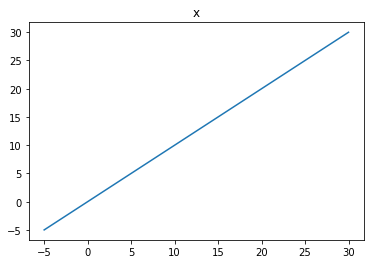

Value counted with Rectangle method -->  437.5
Value counted with Trapeze method -->  437.5
Value counted with Simpson method -->  371.58333333333337
Actual value --> 437.5
Estimating errors:
For Rectangle method 0.0
For Trapeze method 0.0
For Simpson method 0.1506666666666666


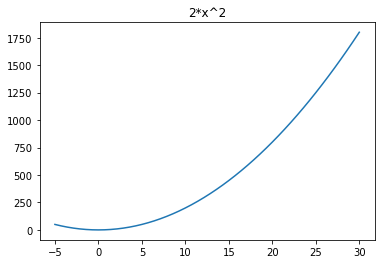

Value counted with Rectangle method -->  18226.25
Value counted with Trapeze method -->  18226.25
Value counted with Simpson method -->  14359.041666666668
Actual value --> 18083.333333333336
Estimating errors:
For Rectangle method 0.007903225806451478
For Trapeze method 0.007903225806451478
For Simpson method 0.20595161290322583


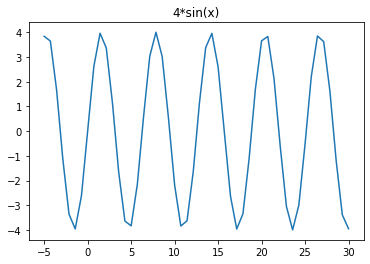

Value counted with Rectangle method -->  -0.16409652265703611
Value counted with Trapeze method -->  -0.16409652265703611
Value counted with Simpson method -->  0.3319526537116148
Actual value --> 0.5176429423025688
Estimating errors:
For Rectangle method 1.317007167000298
For Trapeze method 1.317007167000298
For Simpson method 0.35872272838294716


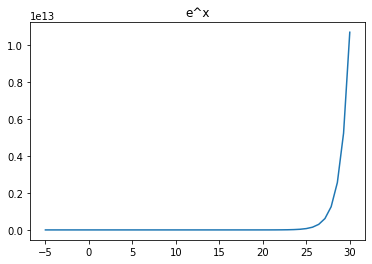

Value counted with Rectangle method -->  19865961832321.027
Value counted with Trapeze method -->  19865961832321.027
Value counted with Simpson method -->  6756908994915.789
Actual value --> 10686474581524.434
Estimating errors:
For Rectangle method 0.8589818074022998
For Trapeze method 0.8589818074022998
For Simpson method 0.3677139319081306


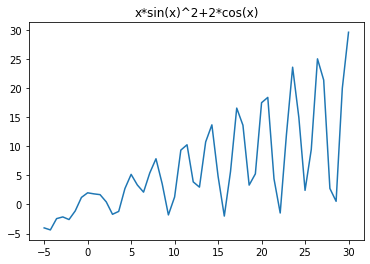

Value counted with Rectangle method -->  236.40125843685462
Value counted with Trapeze method -->  236.40125843685462
Value counted with Simpson method -->  213.0795180894766
Actual value --> 216.4763091535603
Estimating errors:
For Rectangle method 0.09204217016264954
For Trapeze method 0.09204217016264954
For Simpson method 0.015691283158722594


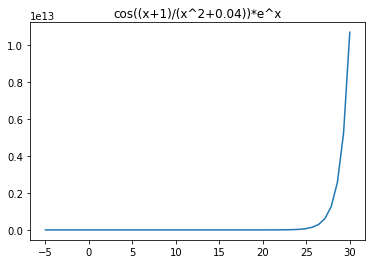

Value counted with Rectangle method -->  19853967640429.03
Value counted with Trapeze method -->  19853967640429.03
Value counted with Simpson method -->  6752790338141.467
Actual value --> 10679647848261.193
Estimating errors:
For Rectangle method 0.8590470324975701
For Trapeze method 0.8590470324975701
For Simpson method 0.36769541148859863


In [25]:
print("From -5 to 30 number with integration 10 intervals ")
start=-5
end=30
numberOfPoints=10
showIntegral(linearF,start,end,numberOfPoints,"x")
showIntegral(squareF,start,end,numberOfPoints,"2*x^2")
showIntegral(sinF,start,end,numberOfPoints,"4*sin(x)")
showIntegral(eulerF,start,end,numberOfPoints,"e^x")
showIntegral(trigonometricF,start,end,numberOfPoints,"x*sin(x)^2+2*cos(x)")
showIntegral(mixF,start,end,numberOfPoints,"cos((x+1)/(x^2+0.04))*e^x")

From -5 to 30 number with 100000 integration intervals 


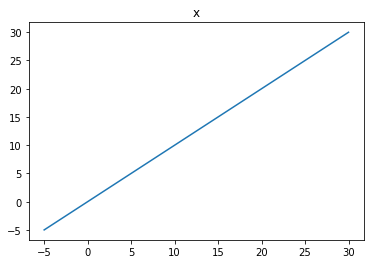

Value counted with Rectangle method -->  437.49999999999983
Value counted with Trapeze method -->  437.49999999999983
Value counted with Simpson method -->  437.4930000408333
Actual value --> 437.5
Estimating errors:
For Rectangle method 3.8978344361696922e-16
For Trapeze method 3.8978344361696922e-16
For Simpson method 1.5999906666755644e-05


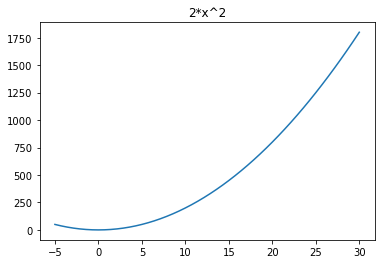

Value counted with Rectangle method -->  18083.333334762458
Value counted with Trapeze method -->  18083.333334762458
Value counted with Simpson method -->  18082.913338233226
Actual value --> 18083.333333333336
Estimating errors:
For Rectangle method 7.902977511733083e-11
For Trapeze method 7.902977511733083e-11
For Simpson method 2.3225535489959438e-05


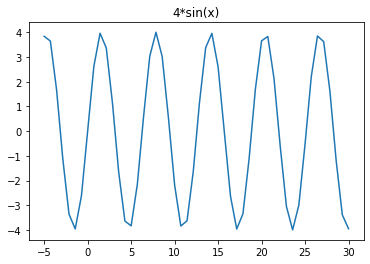

Value counted with Rectangle method -->  0.5176429370183134
Value counted with Trapeze method -->  0.5176429370183134
Value counted with Simpson method -->  0.5185651303319904
Actual value --> 0.5176429423025688
Estimating errors:
For Rectangle method 1.0208301774782668e-08
For Trapeze method 1.0208301774782668e-08
For Simpson method 0.0017815137695483855


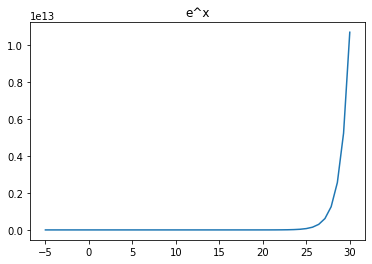

Value counted with Rectangle method -->  10686474690615.53
Value counted with Trapeze method -->  10686474690615.53
Value counted with Simpson method -->  10683981507114.916
Actual value --> 10686474581524.434
Estimating errors:
For Rectangle method 1.0208333428475069e-08
For Trapeze method 1.0208333428475069e-08
For Simpson method 0.00023329250357529408


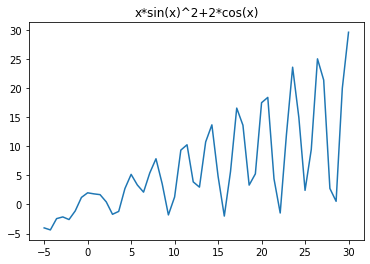

Value counted with Rectangle method -->  216.47630912830672
Value counted with Trapeze method -->  216.47630912830672
Value counted with Simpson method -->  216.46940347148396
Actual value --> 216.4763091535603
Estimating errors:
For Rectangle method 1.1665743009315792e-10
For Trapeze method 1.1665743009315792e-10
For Simpson method 3.1900405653340226e-05


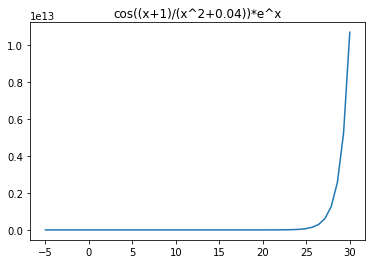

Value counted with Rectangle method -->  10679647957292.754
Value counted with Trapeze method -->  10679647957292.754
Value counted with Simpson method -->  10677156252508.947
Actual value --> 10679647848261.193
Estimating errors:
For Rectangle method 1.0209284247572542e-08
For Trapeze method 1.0209284247572542e-08
For Simpson method 0.00023330317512779814


In [26]:
print("From -5 to 30 number with 100000 integration intervals ")
start=-5
end=30
numberOfPoints=100000
showIntegral(linearF,start,end,numberOfPoints,"x")
showIntegral(squareF,start,end,numberOfPoints,"2*x^2")
showIntegral(sinF,start,end,numberOfPoints,"4*sin(x)")
showIntegral(eulerF,start,end,numberOfPoints,"e^x")
showIntegral(trigonometricF,start,end,numberOfPoints,"x*sin(x)^2+2*cos(x)")
showIntegral(mixF,start,end,numberOfPoints,"cos((x+1)/(x^2+0.04))*e^x")